<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Compare-pass/fail" data-toc-modified-id="Compare-pass/fail-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compare pass/fail</a></span><ul class="toc-item"><li><span><a href="#check/format" data-toc-modified-id="check/format-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>check/format</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Success-rate" data-toc-modified-id="Success-rate-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Success rate</a></span><ul class="toc-item"><li><span><a href="#Writing-table-of-samples" data-toc-modified-id="Writing-table-of-samples-5.2.1.1"><span class="toc-item-num">5.2.1.1&nbsp;&nbsp;</span>Writing table of samples</a></span></li></ul></li><li><span><a href="#No.-of-samples" data-toc-modified-id="No.-of-samples-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>No. of samples</a></span></li><li><span><a href="#Passed-per-species" data-toc-modified-id="Passed-per-species-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Passed per species</a></span></li><li><span><a href="#Mapping-onto-host-tree" data-toc-modified-id="Mapping-onto-host-tree-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Mapping onto host tree</a></span><ul class="toc-item"><li><span><a href="#Host-metadata" data-toc-modified-id="Host-metadata-5.2.4.1"><span class="toc-item-num">5.2.4.1&nbsp;&nbsp;</span>Host metadata</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summary of NGS pass/fail samples
  * how many succeeded of the total?
  

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/NGS/'

# all samples
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_200429.tsv'

# host tree for all species
host_tree_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/TT/unified_metadata_complete_20190416_rn.nwk'

## all samples & taxa
physeq_all_file = file.path('/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_all.RDS')

## 16S-arch phyloseq object (one sample per individual)
physeq_arch_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S_arch/MiSeq-Runs-116-122-126-189-190/LLA/merged/phyloseq/physeq_arch_IndD.RDS'

# params
threads = 8

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(phyloseq)
library(LeyLabRMisc)

In [3]:
df.dims()

# Load

In [5]:
# all sample metadata
metadata = read.delim(metadata_file, sep='\t')
metadata 

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,temp_regulation,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,ectotherm/poikilotherm,8/10/10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,endotherm/homoiotherm,9/29/10,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,189.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,3/1/12,winter,467,Eppendorf tube,feces sampling,carnivore,NA,simple,simple
X232_fail_Brown_Trout,232.fail,Seeforelle,Brown.Trout,Salmo_trutta,NA,8032,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,3/15/12,winter,453,Polyethylene freezer bag,gut section,carnivore,NA,simple,simple


In [6]:
# host tree
host_tree = read.tree(host_tree_file)
host_tree


Phylogenetic tree with 199 tips and 198 internal nodes.

Tip labels:
	Perca_fluviatilis, Gymnocephalus_cernua, Sander_lucioperca, Zingel_zingel, Neogobius_melanostomus, Esox_lucius, ...
Node labels:
	, @_22_@, @_8_@, @_4_@, @_3_@, @_1_@, ...

Rooted; includes branch lengths.

In [7]:
# all samples
physeq_all = readRDS(physeq_all_file)
## filtering
x = physeq_all %>% sample_names
x = x[grepl('Neg_control', x)]
physeq_all_neg = subset_samples(physeq_all, SampleID %in% x) %>%
    filter_taxa(function(x) max(x) > 0, TRUE)
## summary
physeq_all_neg

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 267 taxa and 9 samples ]
sample_data() Sample Data:       [ 9 samples by 71 sample variables ]
tax_table()   Taxonomy Table:    [ 267 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 267 tips and 266 internal nodes ]

In [8]:
# all passed samples
physeq_arch_IndD = readRDS(physeq_arch_IndD_file)
physeq_arch_IndD

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1891 taxa and 185 samples ]
sample_data() Sample Data:       [ 185 samples by 88 sample variables ]
tax_table()   Taxonomy Table:    [ 1891 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1891 tips and 1888 internal nodes ]

In [9]:
# formatting
otu = physeq_arch_IndD %>%
    phyloseq2df(otu_table, long=TRUE) %>%
    group_by(Sample) %>%
    mutate(Total_count = sum(Count)) %>%
    ungroup() %>%
    filter(Count > 0)

tax = physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>%
    filter(Class == 'Bathyarchaeia')

otu = otu %>%
    inner_join(tax, c('OTU')) 

otu %>% .$Sample %>% table

.
   F14_Common_Bream          X214_Goose          X219_Goose   X327_Silver_Bream 
                  2                   1                   1                   1 
   X34_Mallard_Duck    X349_Smooth_Newt    X350_Smooth_Newt X405_Nile_Crocodile 
                  1                   9                   7                   2 

In [10]:
# summary
physeq_arch_IndD %>%
    phyloseq2df(tax_table) %>% 
    distinct(Phylum, Class) %>%
    arrange(Phylum, Class)

Phylum,Class
<chr>,<chr>
Asgardaeota,Odinarchaeia
Crenarchaeota,Bathyarchaeia
⋮,⋮
Nanoarchaeaeota,Woesearchaeia
Thaumarchaeota,Nitrososphaeria


In [11]:
# MiSeq runs 116-122-126
samps = c('1_Eurasian_Beaver', '2_Raccoon_Dog', '5_European_Hare', '21_Yellow_necked_Field_Mouse',
  '43_European_Badger', '66_Mouflon', '73_One_humped_Camel', '77_Onager', '78_Indian_Gazelle',
  '81_Wolf', '87_Garden_Dormouse', '88_European_Rabbit', '101_Horse', '102_Kulan', '111_West_European_Hedgehog',
  '122_Wild_Boar', '137_Gaur', '140_Sambar', '144_Cattle', '152_Tree_Shrew', '198_Human',
  '206_Red_Sheep', '237_Red_shanked_Douc_Langur', '272_Black_Grouse', '275_Barnacle_Goose',
  '279_Western_Grey_Kangaroo', '285_Short_beaked_Echidna', '287_Common_Brushtail', '289_Eastern_Grey_Kangaroo',
  '311_Domestic_Cat', '320_Red_Deer', '376_Kulan', '395_Przewalski_horse', '407_African_Bush_Elephant',
  '417_Giraffe', '419_African_Buffalo', '422_Common_Hippopotamus', '424_Quagga', '95_Meadow_Viper',
  '123_Alpine_Chamois', '128_Alpine_Marmot', '129_Alpine_Ibex', '131_Rock_Ptarmigan', '155_Long_tailed_Field_Mouse',
  '169_Great_Cormorant', '268_Rook', '351_Grass_Snake', '389_Indian_Rhinoceros', '7_European_Otter',
  '9_Indian_Gazelle', '11_Onager', '13_Wolf', '15_Tawny_Owl', '16_Fat_Dormouse', '22_European_Rabbit',
  '23_Garden_Dormouse', '31_Chicken', '32_Greylag_Goose', '33_Wild_Turkey', '34_Mallard_Duck',
  '40_Bactrian_Camel', '41_Pika', '42_Goitered_Gazelle', '60_European_Chub', '85_Domestic_Dog', 
  '93_Red_Sheep', '94_Mangalica', '96_European_Hare', '116_Common_Kestrel', '121_Raccoon_Dog', 
  '135_Horse', '138_Gaur', '139_Sambar', '141_Red_cheeked_Gibbon', '150_Cattle', '154_Tree_Shrew', 
  '157_Grey_Heron', '158_White_tailed_Eagle', '164_Greylag_Goose', '170_Tawny_Owl', '172_European_Greenfinch', 
  '174_Great_Tit', '195_Domestic_Cat', '196_Domestic_Cat', '197_Human', '199_Human', '200_Human', 
  '203_Red_Deer', '205_Red_Sheep', '207_Red_Sheep', '208_Red_Sheep', '209_Red_Sheep', '210_Red_Sheep', 
  '211_Red_Sheep', '212_Goose', '213_Goose', '214_Goose', '215_Goose', '218_Goose', '219_Goose', 
  '221_Alpine_Ibex', '223_Human', '224_Domestic_Cat', '225_Domestic_Cat', '226_Domestic_Cat',
  '228_Domestic_Cat', '230_Carrion_Crow', '234_Beech_Marten', '238_Hanuman_Langur', 
  '240_Southern_White_cheeked_Gibbon', '252_Eurasian_Lynx', '259_Mute_Swan', '263_White_Stork', 
  '265_Western_Marsh_Harrier', '270_Common_Pheasant', '271_Common_Pheasant', '276_Barnacle_Goose', 
  '280_Western_Grey_Kangaroo', '283_Koala', '284_Koala', '286_Short_beaked_Echidna', '290_Eastern_Grey_Kangaroo', 
  '301_European_Hare', '302_European_Hare', '303_European_Hare', '304_European_Hare', '305_European_Hare', 
  '306_European_Hare', '307_European_Hare', '308_European_Hare', '309_Domestic_Cat', '310_Domestic_Cat', 
  '312_Domestic_Cat', '313_Red_Deer', '314_Red_Deer', '315_Red_Deer', '316_Red_Deer', '317_Red_Deer', 
  '318_Red_Deer', '319_Red_Deer', '322_Red_Deer', '324_Red_Deer', '330_Ide', '332_Harbor_Porpoise', 
  '333_Gray_Seal', '336_Sei_Whale', '338_White_beaked_Dolphin', '339_White_beaked_Dolphin', 
  '340_Western_Lowland_Gorilla', '341_Western_Lowland_Gorilla', '344_Indian_Rhinoceros', '347_Brown_Bear', 
  '348_European_Rabbit', '352_Kinkajou', '353_Raccoon', '355_Hoffmanns_Two_toed_Sloth', '356_Northern_Tamandua', 
  '360_White_tailed_Deer', '362_Gray_Four_eyed_Opossum', '363_Desmarests_Spiny_Pocket_Mouse', 
  '368_European_Ground_Squirrel', '369_Koala', '370_African_Bush_Elephant', '371_Linnaeus_Two_toed_Sloth', 
  '372_Emu', '378_Fat_Sand_Rat', '379_Koala', '390_European_Ground_Squirrel', '391_European_Ground_Squirrel', 
  '393_European_Rabbit', '394_Przewalski_horse', '396_Morelets_crocodile', '397_Penguin', '404_Brown_Greater_Galago', 
  '408_African_Bush_Elephant', '409_Impala', '410_Impala', '411_Leopard', '412_Lion', '414_Vervet_Monkey', 
  '415_White_Rhinoceros', '416_White_Rhinoceros', '418_Giraffe', '420_Cattle', '421_Common_Hippopotamus', 
  '423_Quagga', '426_Ural_Owl', '427_Great_Spotted_Woodpecker', '428_African_Bush_Elephant', '429_Giraffe', 
  '430_Giraffe', '432_Vervet_Monkey', '433_Raccoon', '434_Blue_Wildebeest', '435_Bactrian_Camel', 
  'F14_Common_Bream', 'F35_Red_Deer', 'F36_Red_Deer', 'F44_Fallow_Deer', 'F45_Red_Deer', 'F46_Red_Deer', 
  'F47_Red_Deer', 'F48_Red_Deer', 'Pos_control_7', 'Neg_control_7', 'F53_Mouflon', 'F66_Wild_Boar', 
  'F68_Red_Deer', 'F69_Red_Deer', 'F70_Red_Deer', 'F80_Red_Deer', 'F90_Domestic_Dog', '108_Striped_Desert_Hamster', 
  '109_Red_Fox', '117_Long_eared_Owl', '119_Ural_Owl', '192_Common_Frog', '194_Agile_Frog', '125_Common_Carp', 
  '126_White_Stork', '130_Alpine_Ibex', '146_Cattle', '153_Bank_Vole', '179_Roach', '233_Aesculapian_Snake', 
  '236_Pygmy_Slow_Loris', '241_Italian_wall_lizard', '242_Dalmatian_Tortoise', '243_Noctule', 
  '247_Common_Hamster', '260_Blackbird', '264_Eurasian_Magpie', '266_Western_Marsh_Harrier', 
  '288_Common_Brushtail', '292_Central_Bearded_Dragon', '297_Horsfields_Bronze_Cuckoo', 
  '326_Silver_Bream', '327_Silver_Bream', '328_Prussian_Carp', '349_Smooth_Newt', '350_Smooth_Newt', 
  '380_Wild_Boar', '381_Wild_Boar', '382_Arctic_Wolf', '383_Arctic_Wolf', 'Pos_control_9', 
  '384_Eurasian_Lynx', '386_Scalloped_Hammerhead', '400_House_Mouse', 'Neg_control_9', '43_European_Badger', 
  '66_Mouflon', '73_One_humped_Camel', '77_Onager', '88_European_Rabbit', '101_Horse', '102_Kulan', 
  '111_West_European_Hedgehog', '122_Wild_Boar', '137_Gaur', '140_Sambar', '144_Cattle', '206_Red_Sheep', 
  '237_Red_shanked_Douc_Langur', '279_Western_Grey_Kangaroo', '285_Short_beaked_Echidna', '287_Common_Brushtail', 
  '289_Eastern_Grey_Kangaroo', '320_Red_Deer', '376_Kulan', '395_Przewalski_horse', '407_African_Bush_Elephant', 
  '417_Giraffe', '419_African_Buffalo', '422_Common_Hippopotamus', '424_Quagga', '95_Meadow_Viper', 
  '123_Alpine_Chamois', '128_Alpine_Marmot', '129_Alpine_Ibex', '131_Rock_Ptarmigan', '268_Rook', 
  '351_Grass_Snake', '389_Indian_Rhinoceros', '7_European_Otter', '11_Onager', '13_Wolf', '23_Garden_Dormouse', 
  '31_Chicken', '32_Greylag_Goose', '34_Mallard_Duck', '40_Bactrian_Camel', '42_Goitered_Gazelle', 
  '60_European_Chub', '94_Mangalica', '96_European_Hare', '116_Common_Kestrel', '121_Raccoon_Dog', 
  '135_Horse', '138_Gaur', '139_Sambar', '150_Cattle', '154_Tree_Shrew', '172_European_Greenfinch', 
  '174_Great_Tit', '203_Red_Deer', '205_Red_Sheep', '207_Red_Sheep', '208_Red_Sheep', '209_Red_Sheep', 
  '210_Red_Sheep', '211_Red_Sheep', '212_Goose', '213_Goose', '214_Goose', '215_Goose', '218_Goose', 
  '219_Goose', '221_Alpine_Ibex', '238_Hanuman_Langur', '240_Southern_White_cheeked_Gibbon', 
  '270_Common_Pheasant', '271_Common_Pheasant', '280_Western_Grey_Kangaroo', '283_Koala', 
  '286_Short_beaked_Echidna', '290_Eastern_Grey_Kangaroo', '313_Red_Deer', '314_Red_Deer', 
  '315_Red_Deer', '316_Red_Deer', '317_Red_Deer', '318_Red_Deer', '319_Red_Deer', '322_Red_Deer', 
  '324_Red_Deer', '330_Ide', '333_Gray_Seal', '336_Sei_Whale', '339_White_beaked_Dolphin', 
  '340_Western_Lowland_Gorilla', '341_Western_Lowland_Gorilla', '344_Indian_Rhinoceros', 
  '352_Kinkajou', '356_Northern_Tamandua', '360_White_tailed_Deer', '368_European_Ground_Squirrel', 
  '369_Koala', '370_African_Bush_Elephant', '371_Linnaeus_Two_toed_Sloth', '372_Emu', '378_Fat_Sand_Rat', 
  '390_European_Ground_Squirrel', '396_Morelets_crocodile', '408_African_Bush_Elephant', '409_Impala', 
  '410_Impala', '411_Leopard', '415_White_Rhinoceros', '416_White_Rhinoceros', '418_Giraffe', '420_Cattle', 
  '421_Common_Hippopotamus', '423_Quagga', '428_African_Bush_Elephant', '429_Giraffe', '430_Giraffe', 
  '432_Vervet_Monkey', '434_Blue_Wildebeest', '435_Bactrian_Camel', 'F14_Common_Bream', 'F35_Red_Deer', 
  'F36_Red_Deer', 'F44_Fallow_Deer', 'F45_Red_Deer', 'F46_Red_Deer', 'F47_Red_Deer', 'F48_Red_Deer', 
  'F53_Mouflon', 'F66_Wild_Boar', 'F68_Red_Deer', 'F69_Red_Deer', 'F70_Red_Deer', 'F80_Red_Deer', 
  'F90_Domestic_Dog', '117_Long_eared_Owl', '130_Alpine_Ibex', '146_Cattle', '179_Roach', 
  '233_Aesculapian_Snake', '236_Pygmy_Slow_Loris', '242_Dalmatian_Tortoise', '247_Common_Hamster', 
  '266_Western_Marsh_Harrier', '288_Common_Brushtail', '327_Silver_Bream', '328_Prussian_Carp', 
  '349_Smooth_Newt', '350_Smooth_Newt', '380_Wild_Boar', '381_Wild_Boar', '382_Arctic_Wolf')

samps = unique(samps)
samps = samps[!grepl('_control_', samps)]
samps %>% length

[1] 246

In [12]:
# function to read in PCR results
read_file = function(F, D){
  x = read.delim(file.path(D, F), sep='\t')
  x$labware_name = gsub('.+(plate[0-9]).+', '\\1', F)
  x$labware_type = '96 Well Eppendorf TwinTec PCR'
  return(x)
}

In [13]:
# PCR results
rfu_files = c(
  'sd_2019-11-05_11-00-40_Connect1_1.PCR_Georg_16S_Archaea_plate1_2.part_End_Point_Results.txt',
  'sd_2019-11-05_11-03-35_Connect2_1.PCR_Georg_16S_Archaea_plate2_2.part_End_Point_Results.txt',
  'sd_2019-11-05_11-06-07_Connect3_1.PCR_Georg_16S_Archaea_plate3_2.part_End_Point_Results.txt'
)
D = file.path(work_dir, '191000_SilkeD-prep', 'PCR-step1_plate2')
rfu_sd = rfu_files %>%
  as.list %>%
  lapply(read_file, D=D) %>%
  do.call(rbind, .) %>%
  filter(!grepl('control', Sample)) 
rfu_sd

X,Well,Fluor,Target,Content,Sample,End.RFU,Call,Sample.Type,CallType,Is.Control,labware_name,labware_type
<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<dbl>,<lgl>,<fct>,<fct>,<fct>,<chr>,<chr>
NA,A01,SYBR,NA,Unkn,X157_Grey_Heron,142.67,NA,Unknown,Unassigned,False,plate1,96 Well Eppendorf TwinTec PCR
NA,A02,SYBR,NA,Unkn,X164_Greylag_Goose,167.19,NA,Unknown,Unassigned,False,plate1,96 Well Eppendorf TwinTec PCR
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
NA,H11,SYBR,NA,Unkn,X375_European_Pine_Marten,-1.01,NA,Unknown,Unassigned,False,plate3,96 Well Eppendorf TwinTec PCR
NA,H12,SYBR,NA,Unkn,X383_Arctic_Wolf,-2.90,NA,Unknown,Unassigned,False,plate3,96 Well Eppendorf TwinTec PCR


In [14]:
# plate maps
F = file.path(work_dir, '191000_SilkeD-prep', 'PCR_step1_plate1', 'TECAN_NGS_amplicon_PCR1_map.txt')
plate_map = read.delim(F, sep='\t') %>%
    filter(!grepl('control', SampleID)) %>%
    mutate(SampleID = SampleID %>% as.character)
plate_map

SampleID,TECAN_sample_labware_name,TECAN_sample_labware_type,TECAN_sample_target_position,TECAN_primer_labware_name,TECAN_primer_labware_type,TECAN_primer_target_position,TECAN_sample_rxn_volume,Notes,TECAN_pcr_rxn_rep,TECAN_dest_labware_name,TECAN_dest_labware_type,TECAN_dest_target_position,TECAN_water_rxn_volume
<chr>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>
X1_Eurasian_Beaver,Diluted sample plate 1,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,1,516FW-915R,1.5ml Eppendorf,1,1,DNA sample in a 96-well plate,1,Destination plate_Georg_1_PCR_1_part 1,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,1,0
X1_Eurasian_Beaver,Diluted sample plate 1,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,1,516FW-915R,1.5ml Eppendorf,1,1,DNA sample in a 96-well plate,2,Destination plate_Georg_1_PCR_1_part 1,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,2,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X155_Long_tailed_Field_Mouse,Diluted sample plate 3,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,36,516FW-915R,1.5ml Eppendorf,93,1,DNA sample in a 96-well plate,2,Destination plate_Georg_1_PCR_1_part 3,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,86,0
X155_Long_tailed_Field_Mouse,Diluted sample plate 3,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,36,516FW-915R,1.5ml Eppendorf,93,1,DNA sample in a 96-well plate,3,Destination plate_Georg_1_PCR_1_part 3,PCR Adapter 96 Well and 96 Well Eppendorf TwinTec PCR,87,0


In [15]:
# summary
all_samps = c(as.character(rfu_sd$Sample), samps, plate_map$SampleID)
all_samps = all_samps[!grepl('control', all_samps)]
all_samps = gsub('^([^X])', 'X\\1', all_samps)
all_samps = gsub('^(^XF)', 'F', all_samps)
all_samps = all_samps %>% unique %>% sort
all_samps %>% length %>% print
all_samps %>% print

[1] 313
  [1] "F14_Common_Bream"                   "F141_Wood_Sandpiper"               
  [3] "F157a_European_Toad"                "F157b_European_Toad"               
  [5] "F241_Great_Cormorant"               "F300_Asp"                          
  [7] "F302_Northern_Pike"                 "F35_Red_Deer"                      
  [9] "F36_Red_Deer"                       "F42_Fallow_Deer"                   
 [11] "F44_Fallow_Deer"                    "F45_Red_Deer"                      
 [13] "F46_Red_Deer"                       "F47_Red_Deer"                      
 [15] "F48_Red_Deer"                       "F53_Mouflon"                       
 [17] "F66_Wild_Boar"                      "F68_Red_Deer"                      
 [19] "F69_Red_Deer"                       "F70_Red_Deer"                      
 [21] "F80_Red_Deer"                       "F90_Domestic_Dog"                  
 [23] "X1_Eurasian_Beaver"                 "X10_House_Mouse"                   
 [25] "X101_Horse"              

# Compare pass/fail

In [16]:
physeq_arch_IndD %>%
    phyloseq2df(otu_table, long = TRUE) %>%
    group_by(Sample) %>%
    summarize(Count = sum(Count), .groups='drop') %>%
    .$Count %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,251,732,1567,2360.93,2973,32294,12580.34,5135.903


## check/format

In [17]:
# checking overlap
overlap(physeq_arch_IndD %>% sample_names, all_samps)

intersect(x,y): 185 
setdiff(x,y): 0 
setdiff(y,x): 128 
union(x,y): 313 


In [18]:
overlap(metadata$SampleID, all_samps)
overlap(metadata$SampleID, all_samps, to_return='diff_y')

intersect(x,y): 312 
setdiff(x,y): 163 
setdiff(y,x): 1 
union(x,y): 476 


[1] "X9_Indian_Gazelle"

In [19]:
metadata = metadata %>%
    filter(SampleID %in% all_samps) %>%
    mutate(NGS_pass = SampleID %in% (physeq_arch_IndD %>% sample_names))
metadata

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail,NGS_pass
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<lgl>
F14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,8/10/10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple,TRUE
F35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,9/29/10,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X98_Eurasian_Red_Squirrel,98,Eichhoernchen,Eurasian.Red.Squirrel,Sciurus_vulgaris,NA,55149,Mammalia,Rodentia,Sciuridae,⋯,11/3/11,autumn,#VALUE!,Screw cap vial,gut section,omnivore,NA,simple hindgut,caecum,FALSE
X187_fail_Rainbow_Trout,187.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,1/31/12,winter,498,Eppendorf tube,feces sampling,carnivore,NA,simple,simple,FALSE


In [20]:
# summary
metadata$NGS_pass %>% summary

   Mode   FALSE    TRUE 
logical     127     185 

In [21]:
# filter by class
metadata = metadata %>%
    filter(class != 'Chondrichthyes')
metadata$NGS_pass %>% summary

   Mode   FALSE    TRUE 
logical     126     185 

## Summary

### Success rate

In [22]:
df.dims(20)
metadata %>% 
    group_by(class) %>%
    summarize(n_samples = n(), .groups='drop')
df.dims()

class,n_samples
<fct>,<int>
Actinopterygii,16
Amphibia,8
Aves,48
Mammalia,228
Reptilia,11


In [23]:
# overall success rate
sr_class = metadata %>%
    group_by(class) %>%
    mutate(n_samples = n()) %>%
    group_by(class, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Class') %>%
    rename('feature' = class)
sr_class

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
Actinopterygii,TRUE,50,16,Class
Amphibia,TRUE,50,8,Class
⋮,⋮,⋮,⋮,⋮
Mammalia,TRUE,58.33333,228,Class
Reptilia,TRUE,72.72727,11,Class


In [24]:
# overall success rate
sr_st = metadata %>%
    group_by(sample_type) %>%
    mutate(n_samples = n()) %>%
    group_by(sample_type, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Sample type') %>%
    rename('feature' = sample_type)
sr_st

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
feces,TRUE,62.40876,274,Sample type
gut,TRUE,37.83784,37,Sample type


In [25]:
# overall success rate
sr_diet = metadata %>%
    group_by(diet) %>%
    mutate(n_samples = n()) %>%
    group_by(diet, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Diet') %>%
    rename('feature' = diet)
sr_diet

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
carnivore,TRUE,45.88235,85,Diet
herbivore,TRUE,70.37037,135,Diet
omnivore,TRUE,56.04396,91,Diet


In [26]:
# overall success rate
sr_digsys = metadata %>%
    mutate(digestive_system = gsub('fermentation activity ', '', digestive_system)) %>%
    group_by(digestive_system) %>%
    mutate(n_samples = n()) %>%
    group_by(digestive_system, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Digestive system') %>%
    rename('feature' = digestive_system)
sr_digsys

feature,NGS_pass,rate,n_samples,category
<chr>,<lgl>,<dbl>,<int>,<chr>
foregut,TRUE,70.00000,80,Digestive system
hindgut,TRUE,69.04762,42,Digestive system
⋮,⋮,⋮,⋮,⋮
simple foregut,TRUE,40.00000,5,Digestive system
simple hindgut,TRUE,63.41463,41,Digestive system


In [27]:
# overall success rate
sr_hab = metadata %>%
    group_by(habitat) %>%
    mutate(n_samples = n()) %>%
    group_by(habitat, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Habitat') %>%
    rename('feature' = habitat)
sr_hab

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
anthropogenic habitat,TRUE,36.84211,19,Habitat
aquatic habitat,TRUE,50.00000,24,Habitat
terrestrial habitat,TRUE,61.94030,268,Habitat


In [28]:
# overall success rate
sr_cw = metadata %>%
    group_by(captive_wild) %>%
    mutate(n_samples = n()) %>%
    group_by(captive_wild, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Wild/captive') %>%
    rename('feature' = captive_wild)
sr_cw

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
captive,TRUE,55.69620,79,Wild/captive
wild,TRUE,62.11454,227,Wild/captive


In [29]:
sr = list(sr_class, sr_st, sr_diet, sr_digsys, sr_cw) %>%
    do.call(rbind, .)
df.dims(20)
sr
df.dims()

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
Actinopterygii,TRUE,50.00000,16,Class
Amphibia,TRUE,50.00000,8,Class
Aves,TRUE,66.66667,48,Class
Mammalia,TRUE,58.33333,228,Class
Reptilia,TRUE,72.72727,11,Class
feces,TRUE,62.40876,274,Sample type
gut,TRUE,37.83784,37,Sample type
carnivore,TRUE,45.88235,85,Diet
herbivore,TRUE,70.37037,135,Diet


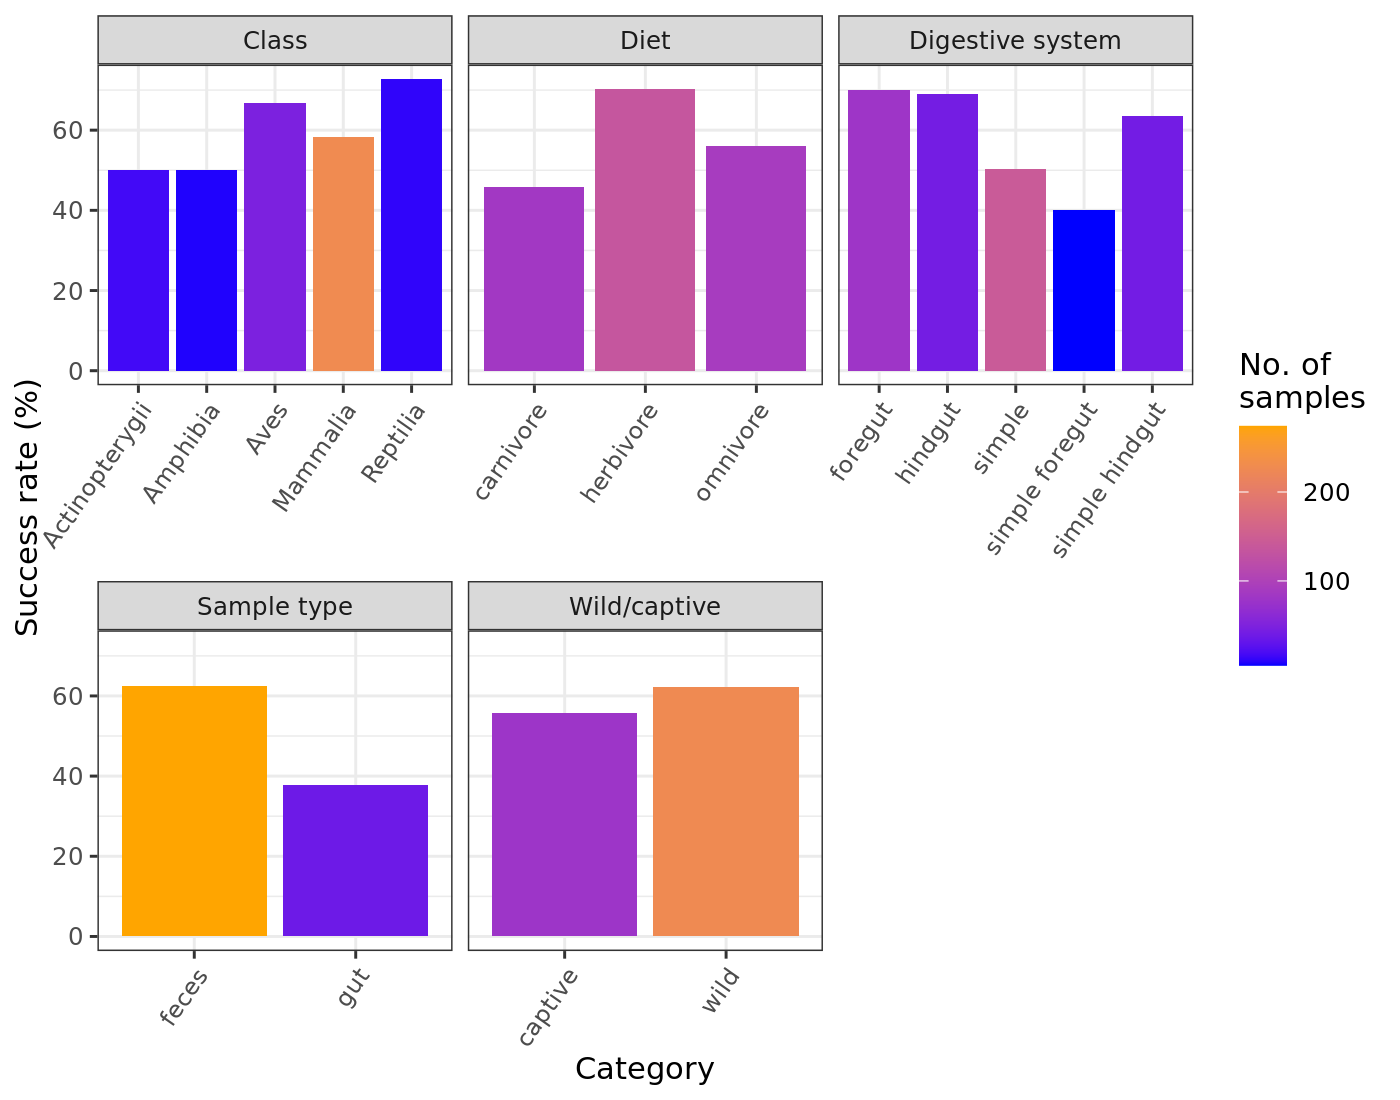

In [30]:
p = sr %>%
    ggplot(aes(feature, rate, fill=n_samples)) +
    geom_bar(stat='identity') +
    scale_fill_gradient('No. of\nsamples', low='blue', high='orange') +
    labs(x='Category', y='Success rate (%)') +
    facet_wrap(~ category, scales='free_x') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(7,5.5)
plot(p)

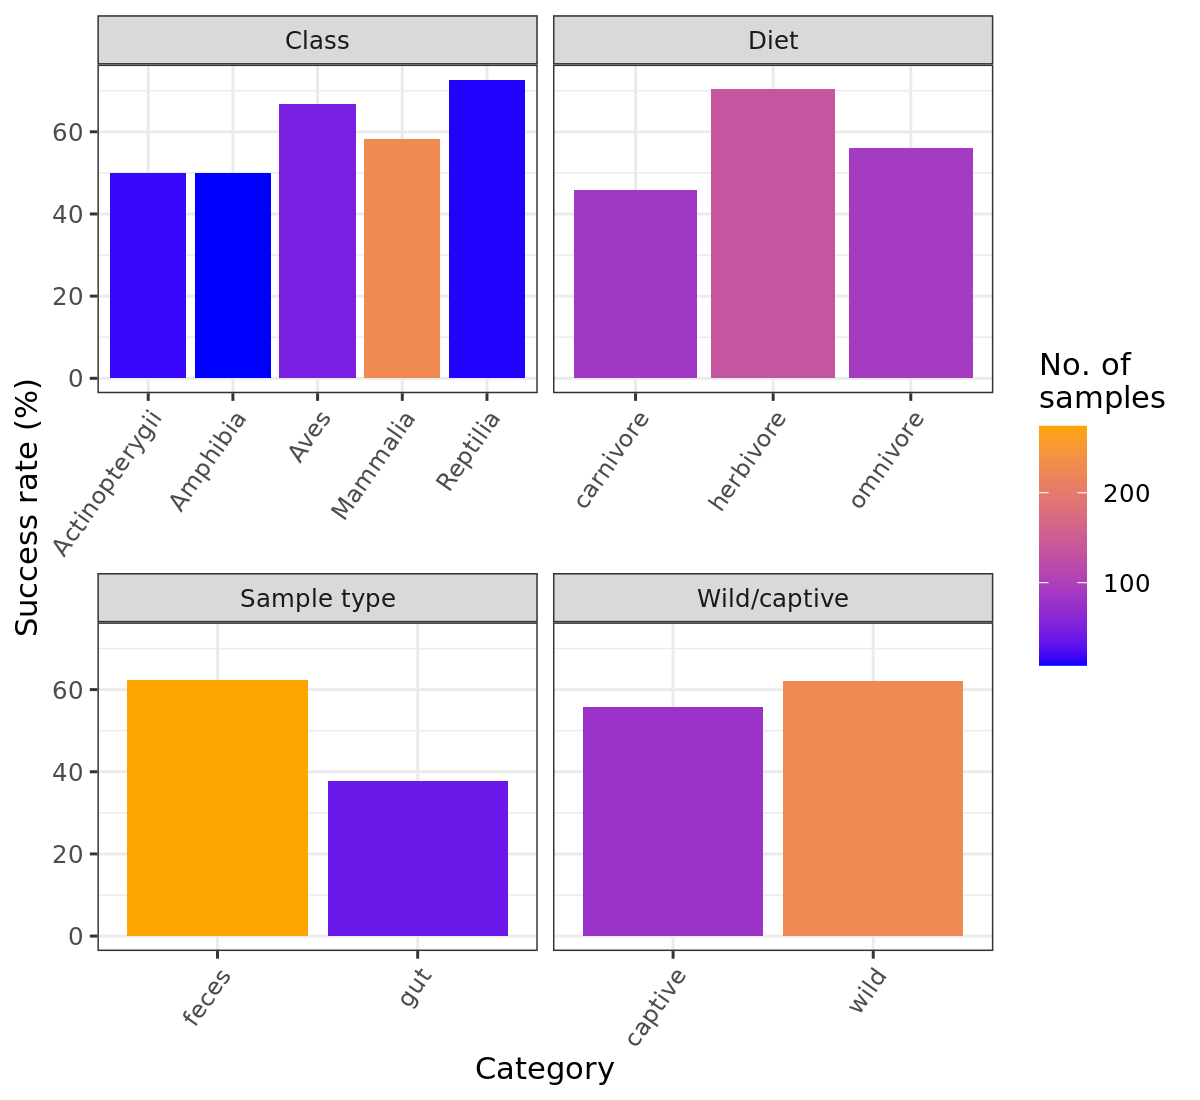

In [31]:
p = sr %>%
    filter(category %in% c('Class', 'Diet', 'Sample type', 'Wild/captive')) %>%
    ggplot(aes(feature, rate, fill=n_samples)) +
    geom_bar(stat='identity') +
    scale_fill_gradient('No. of\nsamples', low='blue', high='orange') +
    labs(x='Category', y='Success rate (%)') +
    facet_wrap(~ category, scales='free_x') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(6,5.5)
plot(p)

In [32]:
# overall success rate
sr_order = metadata %>%
    filter(class == 'Mammalia') %>%
    group_by(order) %>%
    mutate(n_samples = n()) %>%
    group_by(order, NGS_pass) %>%
    summarize(rate = n() / first(n_samples) * 100, 
              n_samples = first(n_samples), 
              .groups='drop') %>%
    filter(NGS_pass == TRUE) %>%
    mutate(category = 'Order') %>%
    rename('feature' = order)
sr_order

feature,NGS_pass,rate,n_samples,category
<fct>,<lgl>,<dbl>,<int>,<chr>
Artiodactyla,TRUE,69.86301,73,Order
Carnivora,TRUE,38.09524,42,Order
⋮,⋮,⋮,⋮,⋮
Rodentia,TRUE,42.30769,26,Order
Scandentia,TRUE,50.00000,2,Order


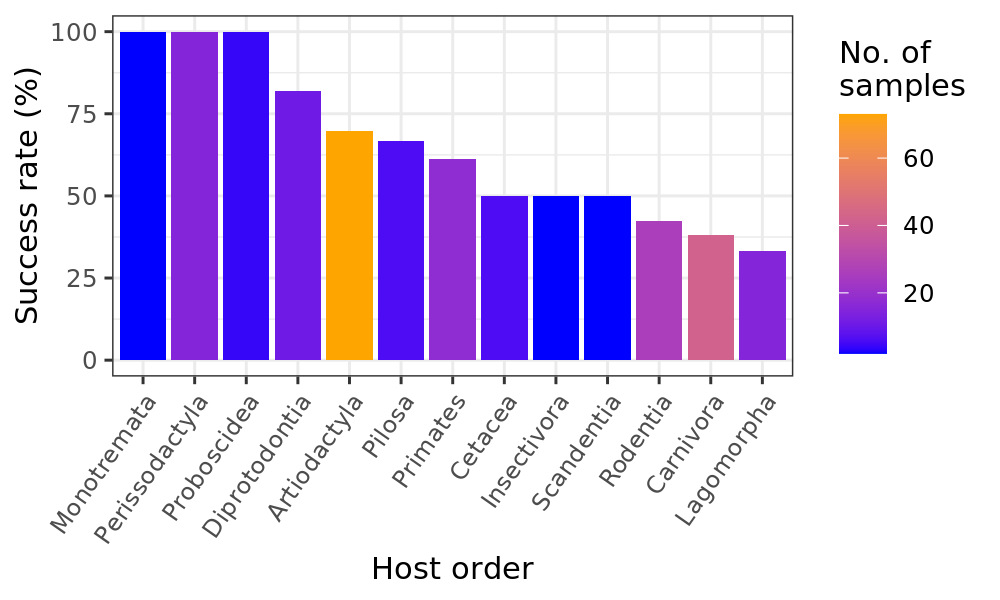

In [33]:
p = sr_order %>%
    mutate(feature = feature %>% reorder(-rate)) %>%
    ggplot(aes(feature, rate, fill=n_samples)) +
    geom_bar(stat='identity') +
    scale_fill_gradient('No. of\nsamples', low='blue', high='orange') +
    labs(x='Host order', y='Success rate (%)') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1)
    )

p.dims(5,3)
plot(p)

#### Writing table of samples

In [49]:
out_file = file.path(work_dir, 'NGS_pass-fail_metadata.tsv')
metadata %>%
    dplyr::select(SampleID, class, order, family, genus, scientific_name,
                  diet, sample_type, NGS_pass) %>%
    mutate(NGS_pass = ifelse(NGS_pass == TRUE, 'pass', 'fail')) %>%
    arrange(class, order, family, genus, scientific_name) %>%
    write_table(out_file)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/NGS//NGS_pass-fail_metadata.tsv 


### No. of samples

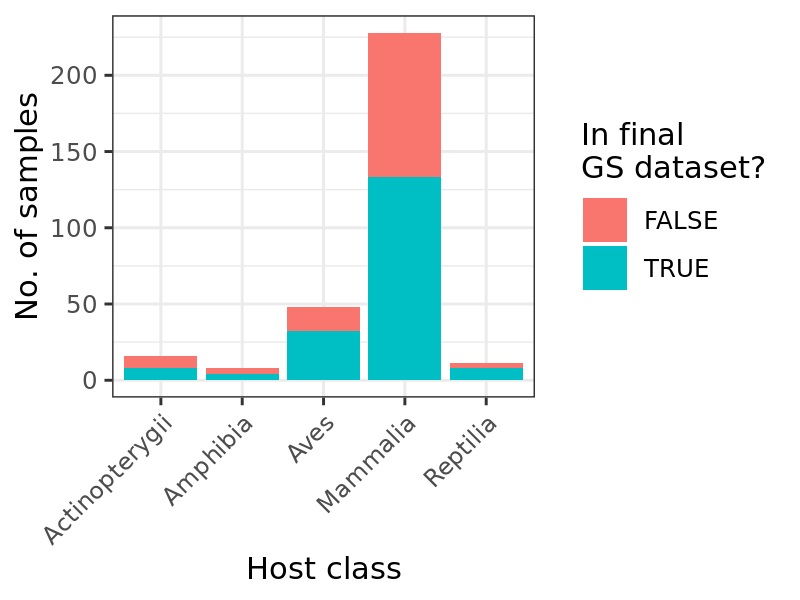

In [34]:
# number of sample samples
p = metadata %>%
    group_by(class, NGS_pass) %>%
    summarize(N = n(), .groups='drop') %>%
    ggplot(aes(class, N, fill=NGS_pass)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('In final\nGS dataset?') +
    labs(x='Host class', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4, 3)
p

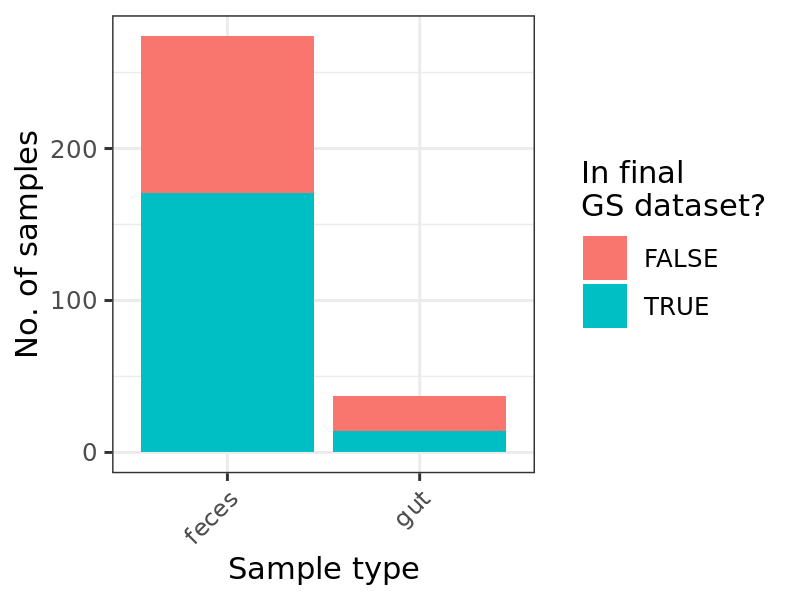

In [35]:
# number of sample samples
p = metadata %>%
    group_by(sample_type, NGS_pass) %>%
    summarize(N = n(), .groups='drop') %>%
    ggplot(aes(sample_type, N, fill=NGS_pass)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('In final\nGS dataset?') +
    labs(x='Sample type', y='No. of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4, 3)
p

### Passed per species

In [36]:
# samples per individual
x = metadata %>%
    filter(!is.na(scientific_name)) %>%
    group_by(scientific_name) %>%
    summarize(n_samples = n(), .groups='drop') 

# species with >1 sample
x %>% filter(n_samples > 1) %>% nrow
# all species
x %>% nrow

[1] 72

[1] 158

In [37]:
# samples per individual
metadata %>%
    filter(!is.na(scientific_name)) %>%
    group_by(scientific_name) %>%
    summarize(n_samples = n(), .groups='drop') %>%
    .$n_samples %>% summary_x

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,1,1,1,1.962025,2,21,8.019,3.274


In [38]:
# % of individuals passed per species
meta_s = metadata %>%    
    filter(!is.na(scientific_name)) %>%
    group_by(class, scientific_name, NGS_pass) %>%
    summarize(N = n(), .groups='drop') %>%
    spread(NGS_pass, N, fill=0) %>%
    mutate(perc_pass = `TRUE` / (`TRUE` + `FALSE`) * 100)
meta_s$perc_pass %>% summary_x
meta_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,0,100,61.02622,100,100,48.992,20.001


class,scientific_name,FALSE,TRUE,perc_pass
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Actinopterygii,Abramis_brama,0,1,100
Actinopterygii,Aspius_aspius,1,0,0
⋮,⋮,⋮,⋮,⋮
Reptilia,Vipera_ursinii,1,1,50
Reptilia,Zamenis_longissimus,0,1,100


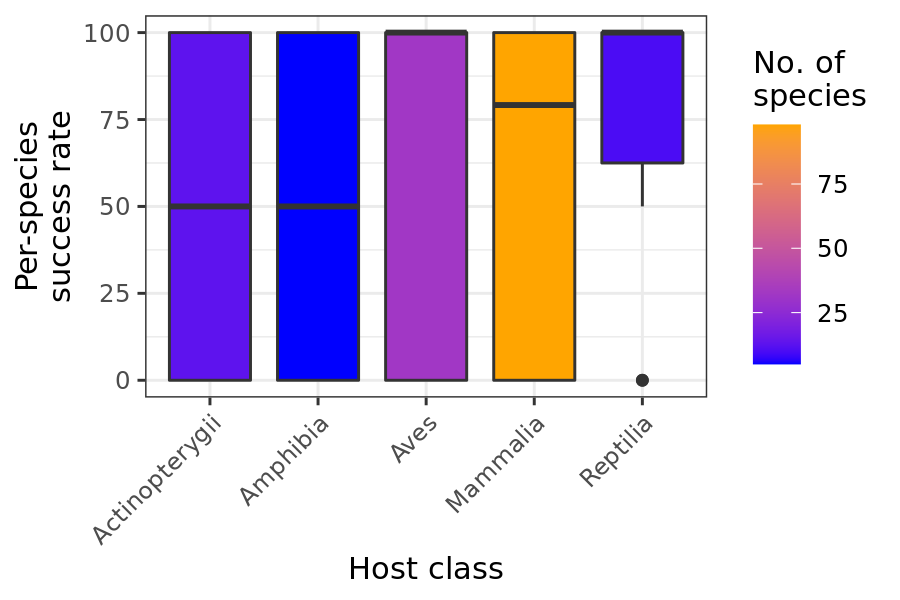

In [39]:
# plotting
p = meta_s %>%
    group_by(class) %>%
    mutate(n_species = n()) %>%
    ungroup() %>%
    ggplot(aes(class, perc_pass, fill=n_species)) +
    geom_boxplot() +
    scale_fill_gradient('No. of\nspecies', low='blue', high='orange') +
    labs(x='Host class', y='Per-species\nsuccess rate') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(4.5, 3)
p

In [40]:
# % of individuals passed per species (just those with >1 sample)
meta_s = metadata %>%    
    filter(!is.na(scientific_name)) %>%
    group_by(scientific_name) %>%
    mutate(n_samples = n()) %>%
    ungroup() %>%
    filter(n_samples > 1) %>%
    group_by(class, scientific_name, NGS_pass) %>%
    summarize(N = n(), .groups='drop') %>%
    spread(NGS_pass, N, fill=0) %>%
    mutate(perc_pass = `TRUE` / (`TRUE` + `FALSE`) * 100)
meta_s$perc_pass %>% summary_x
meta_s

,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
.,0,50,53.57143,63.08532,100,100,37.265,15.213


class,scientific_name,FALSE,TRUE,perc_pass
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Actinopterygii,Blicca_bjoerkna,0,2,100
Actinopterygii,Rutilus_rutilus,1,1,50
⋮,⋮,⋮,⋮,⋮
Mammalia,Vulpes_vulpes,1,1,50
Reptilia,Vipera_ursinii,1,1,50


### Mapping onto host tree

In [80]:
overlap(meta_s$scientific_name, host_tree$tip.label)
overlap(meta_s$scientific_name, host_tree$tip.label, to_return='diff_x')

intersect(x,y): 158 
setdiff(x,y): 0 
setdiff(y,x): 41 
union(x,y): 199 


character(0)

In [81]:
# filtering the tree
to_rm = setdiff(host_tree$tip.label, meta_s$scientific_name)
host_tree_f = ape::drop.tip(host_tree, to_rm)
host_tree_f


Phylogenetic tree with 158 tips and 157 internal nodes.

Tip labels:
	Esox_lucius, Salvelinus_fontinalis, Oncorhynchus_mykiss, Chondrostoma_nasus, Leuciscus_cephalus, Rutilus_rutilus, ...
Node labels:
	, @_22_@, @_7_@, @_5_@, @_20_@, @_17_@, ...

Rooted; includes branch lengths.

In [87]:
# creating itol mapping
df = meta_s %>%
    dplyr::select(scientific_name, `FALSE`, `TRUE`) %>%
    rename('passed' = `TRUE`,
           'failed' = `FALSE`) %>%
    as.data.frame
rownames(df) = df$scientific_name
df$scientific_name = NULL

F = file.path(work_dir, 'NGS_pass-fail_itol-bar.txt')
itol_multibar(df, 'NGS_pass_fail', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/NGS//NGS_pass-fail_itol-bar.txt 


In [89]:
# writing out tree
F = file.path(work_dir, 'NGS_pass-fail_SpecD.nwk')
write.tree(host_tree_f, F)
cat('File written:', F, '\n')

File written: /ebio/abt3_projects/Georg_animal_feces/data/16S_arch/NGS//NGS_pass-fail_SpecD.nwk 


#### Host metadata

# sessionInfo

In [117]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/phyloseq/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ape_5.4           phyloseq_1.30.0   LeyLabRMisc_0.1.6 ggplot2_3.3.1    
[5] tidyr_1.1.0       dplyr_1.0.0      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.4.6        lattice_0.20-41     Biostrings_2.54.0  
 [4] assertthat_0.2.1    digest_0.6.25       foreach_1.5.0